<a href="https://colab.research.google.com/github/anitasigamani/anitasigamani/blob/main/filteroperations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

figsize = (5, 5)


In [ ]:
Filter operations
Filter operations of input frame is performed using numpy and cv2.
 TO test more than one faces in real time scenario first the input image is loaded is cv2.
 The loaded input image is converted from BGR to RGB color.
  The converted image is processed using Mean Kernel smoothing using 2Dfilter with varying sizes of 3,5,10 and 20.
   It is observed that 3X3 mean kernel produces a better smoothing with clarity of information present in the frame.
   Increasing kernel sizes results in lack of complete information and clarity.


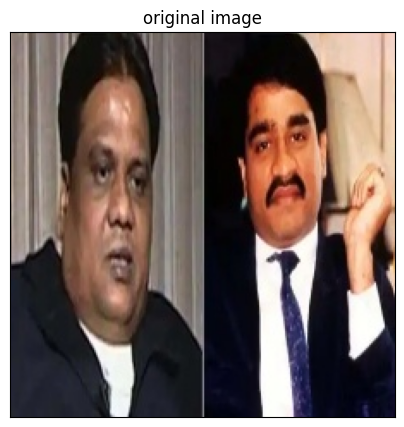

In [ ]:


def plot_im(img, title):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()


img = cv2.imread("/gdrive/MyDrive/mugshots/Testing_images_real_time_scenario_more_than_one_faces/Chhota_Rajan2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_im(img, "original image")



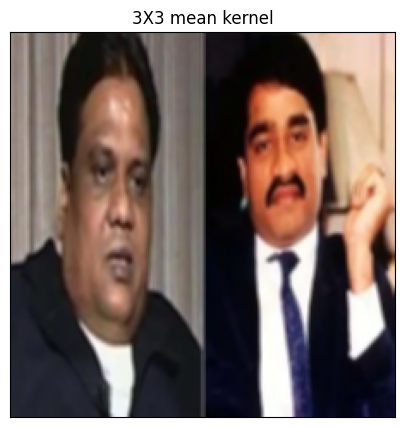

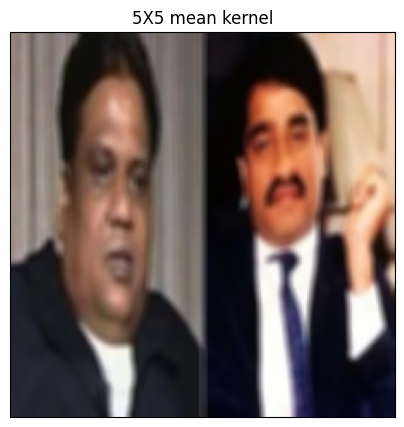

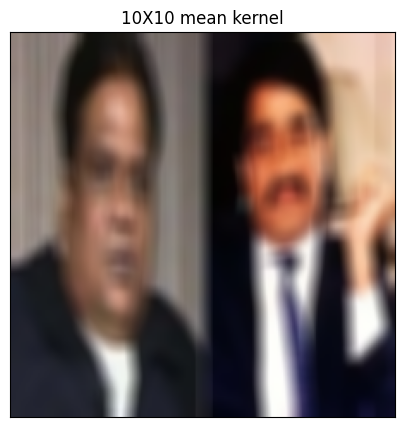

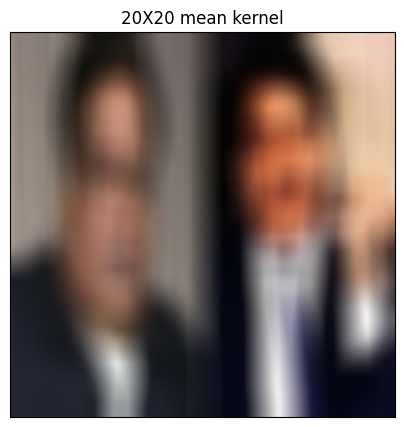

In [ ]:
def mean_kernel_smoothing(img, sz):
    kernel = np.ones((sz, sz)) / (sz ** 2)
    dst = cv2.filter2D(img, -1, kernel)

    plot_im(dst, str(sz) + "X" + str(sz) + " mean kernel")

mean_kernel_smoothing(img, 3)
mean_kernel_smoothing(img, 5)
mean_kernel_smoothing(img, 10)
mean_kernel_smoothing(img, 20)

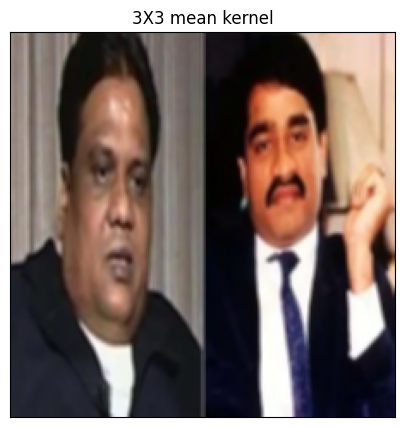

CPU times: user 208 ms, sys: 50.1 ms, total: 258 ms
Wall time: 294 ms


In [ ]:
%%time
time = mean_kernel_smoothing(img, 3)


In [ ]:
Frames affected with noise similar to Gaussian blur are denoised using median filter with 5X5 kernel.

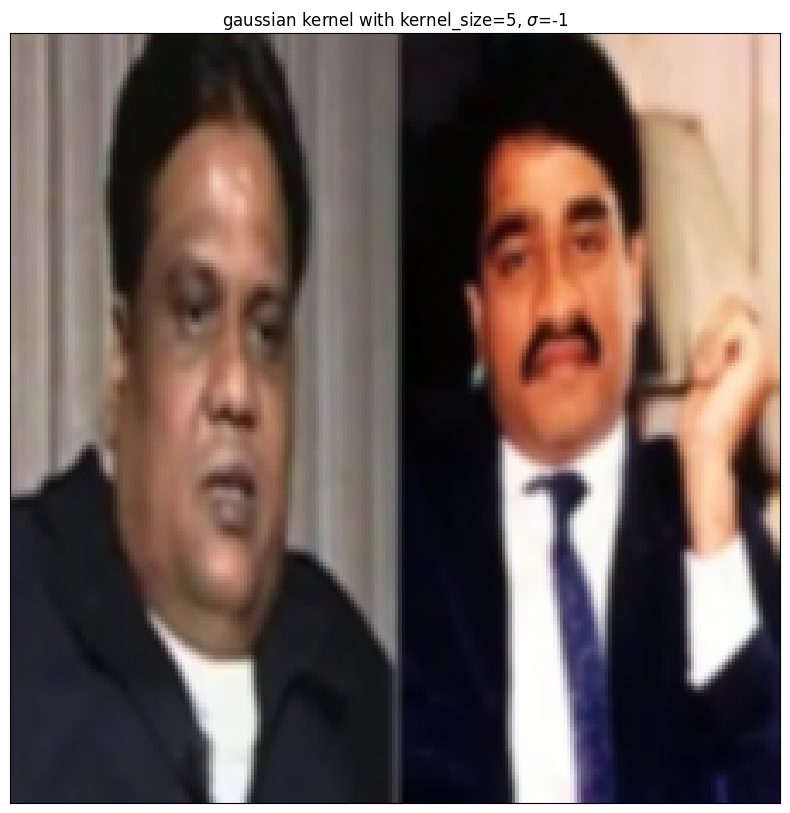

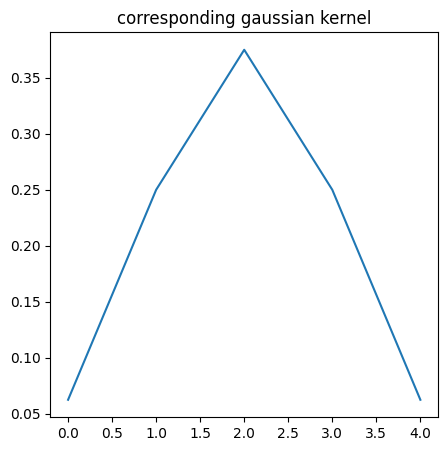

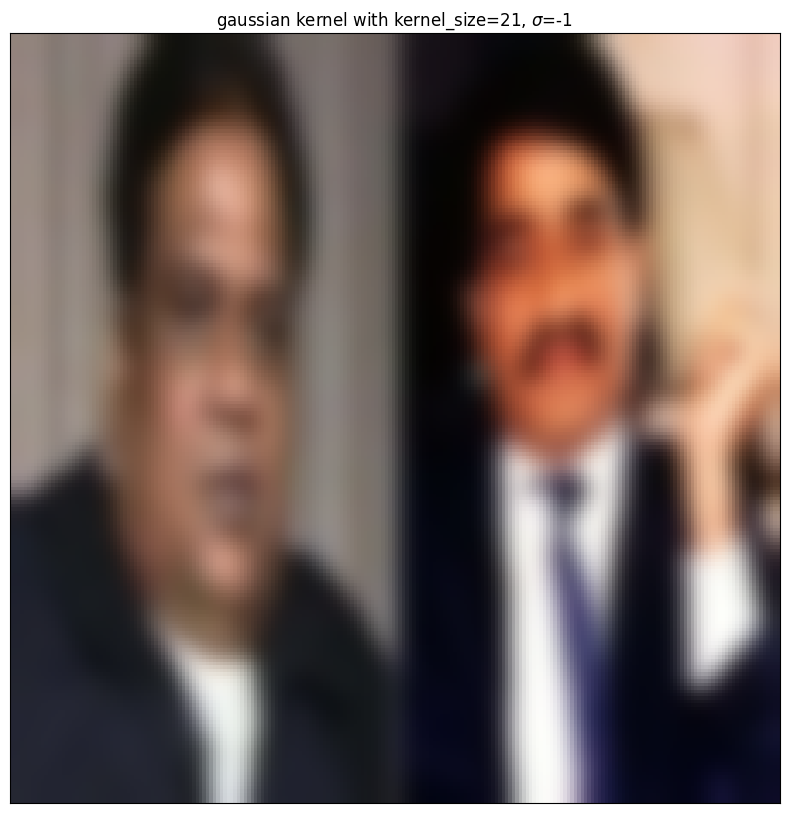

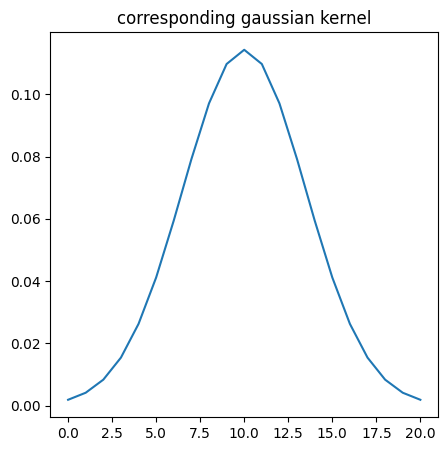

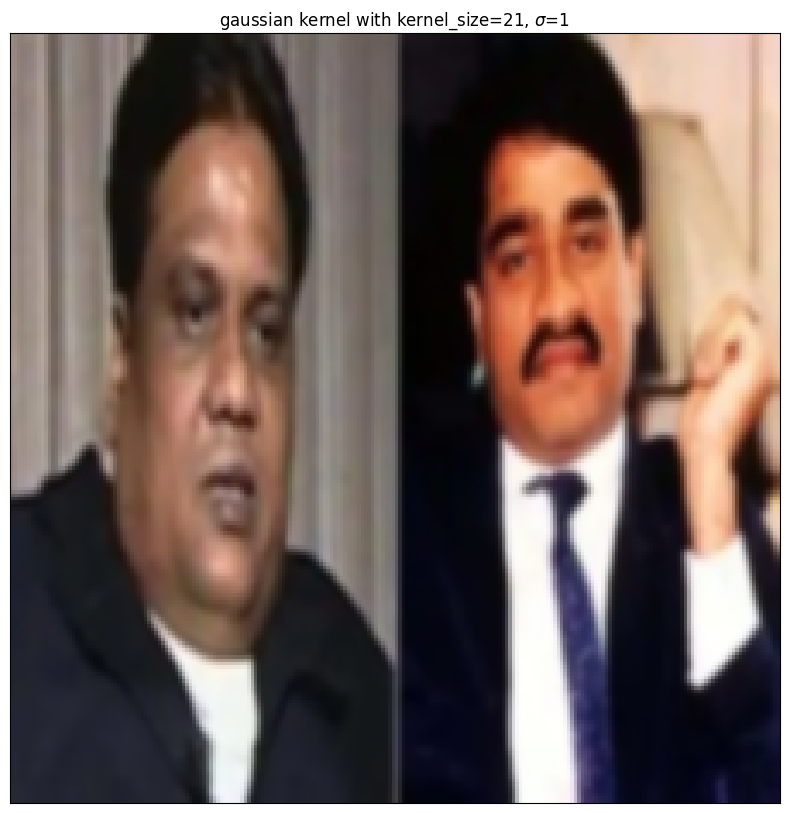

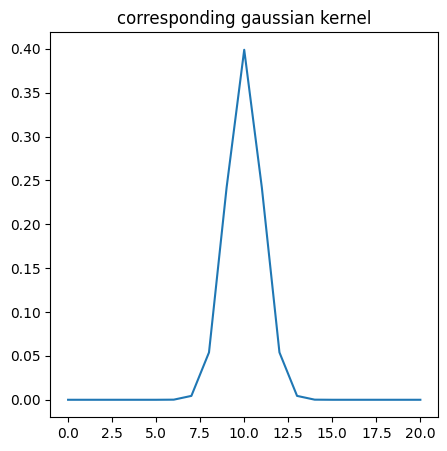

In [ ]:
def gauss_blur(img, k_sz, sigma=-1, is_plot_kernel=False):
    blur = cv2.GaussianBlur(img, (k_sz, k_sz), sigma)
    plot_im(blur, "gaussian kernel with kernel_size=" + str(k_sz) + r", $\sigma$=" + str(sigma))
    if is_plot_kernel:
        # sigma=-1 will set the sigma size automatically
        gauss_ker = cv2.getGaussianKernel(k_sz, sigma)
        plt.figure(figsize=(figsize[0] / 2, figsize[1] / 2))
        plt.plot(gauss_ker)
        plt.title("corresponding gaussian kernel")
        plt.show()


gauss_blur(img, 5, is_plot_kernel=True)
gauss_blur(img, 21, is_plot_kernel=True)
gauss_blur(img, 21, 1, is_plot_kernel=True)

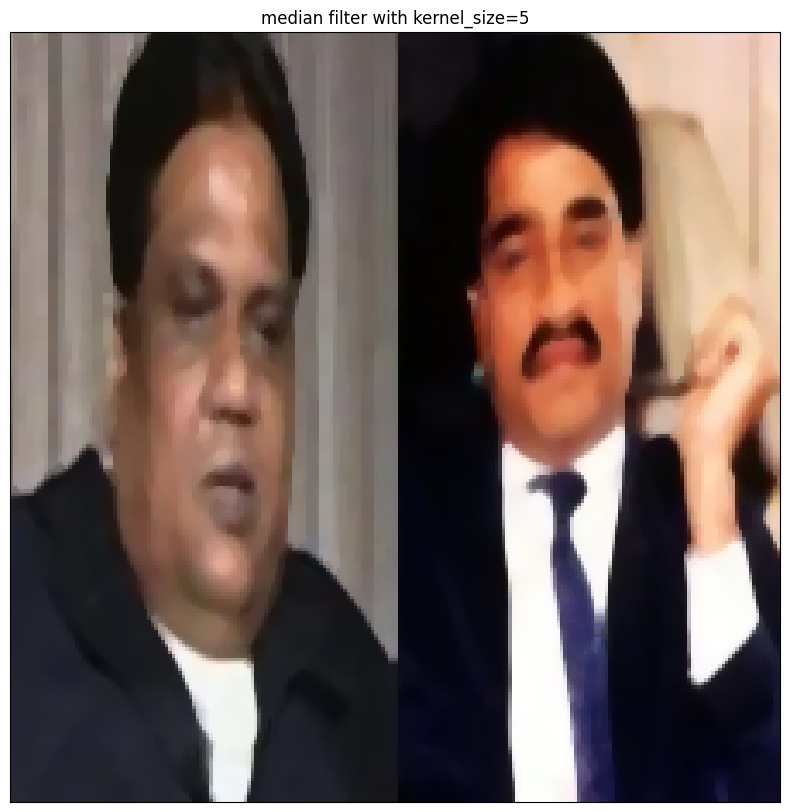

In [ ]:


def median_filter(img, k_sz):
    res = cv2.medianBlur(img, k_sz)
    plot_im(res, "median filter with kernel_size=" + str(k_sz))


median_filter(img, 5)



In [ ]:
def convolution2D(image, mask, valid=False):


    assert mask.shape[0]%2==1 and mask.shape[1]%2==1, "we want mask with a pixel at the center"

    h,w=image.shape

    II,JJ=mask.shape
    I = (II-1) // 2
    J = (JJ-1) // 2

    if not valid:
        """we add padding (=marge) to avoid side problems.
        One can also use np.pad() """
        img_pad = np.zeros([h+2*I,w+2*J])
        img_pad[I:-I,J:-J]=image

        res=np.zeros_like(image)

        for i in range(0,h):
            for j in range(0,w):
                #print(img_pad[i:i+II , j:j+JJ].shape)
                res[i,j]=np.sum(img_pad[i:i+II , j:j+JJ] * mask)
    else:
        res=np.empty((h+2*I, w+2*J))
        for i in range(I, h-I):
            for j in range(J, w-J):
                res[i-I,j-J] = np.sum(image[i-I:i+I+1 , j-J:j+J+1] * mask)

    return res


In [ ]:
import numpy as np
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a[1:3,0:2]

array([[4, 5],
       [7, 8]])

In [ ]:
def convolution2D_valid(img, mask):

    h,w=img.shape
    II,JJ=mask.shape

    res=np.empty((h-II+1, w-JJ+1))
    for i in range(0, h-II+1):
        for j in range(0, w-JJ+1):
            res[i,j] = np.sum(img[i:i+II , j:j+JJ] * mask)

    return res

In [ ]:
img=np.ones([10,10])
mask=np.ones([3,3])
convolution2D_valid(img, mask)

array([[9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9.]])

In [ ]:
image=img.copy()
II=21
JJ=3
mask = np.ones((II,JJ))/II/JJ
print(mask)

[[0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]]


In [ ]:
%%time
imageConv = convolution2D(image,mask,valid=True)

CPU times: user 17 µs, sys: 3 µs, total: 20 µs
Wall time: 23.4 µs


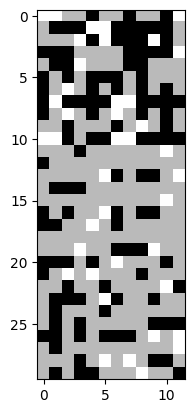

In [ ]:
import  matplotlib.pyplot as plt
plt.imshow(imageConv,cmap='gray');

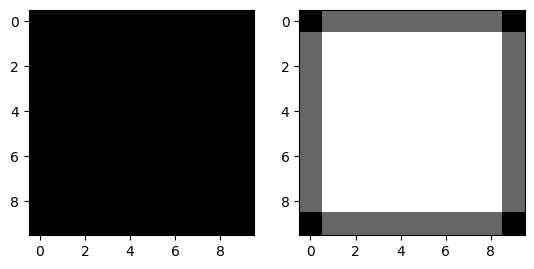

In [ ]:
imageConv = convolution2D(image,mask)

fig,(ax0, ax1) = plt.subplots(1,2)
ax0.imshow(img, cmap='gray')
ax1.imshow(imageConv,cmap='gray');

mask:
 [[-26.84915613 -58.31981735  63.79875682 -12.1273377  -27.89503992]
 [  7.04846309  35.6567026   49.72617869 -25.96348992 -10.0805837 ]
 [-47.22625158  11.69574171  38.72462567 -18.80776555  78.04919828]
 [-62.7487423   69.25666704  55.39046157 -30.8505387   72.63169322]
 [-50.87807144 -58.76745548  19.47414702  -0.96722437 -44.97116155]]


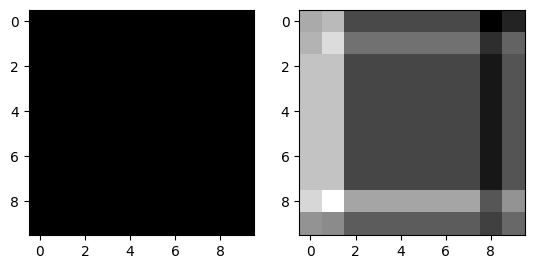

In [ ]:
image=img.copy()
II=5
JJ=5
mask = 2*np.random.random(size=(II,JJ))-1
mask /= np.mean(mask)
print("mask:\n", mask)
imageConv = convolution2D(image,mask)

fig,(ax0, ax1) = plt.subplots(1,2)
ax0.imshow(img, cmap='gray')
ax1.imshow(imageConv,cmap='gray');

In [ ]:
%%time
imageConv = convolution2D(image,mask,valid=True)

CPU times: user 587 µs, sys: 0 ns, total: 587 µs
Wall time: 592 µs


mask:
 [[-0.11 -0.11 -0.11]
 [-0.11 -0.11 -0.11]
 [-0.11 -0.11 -0.11]]


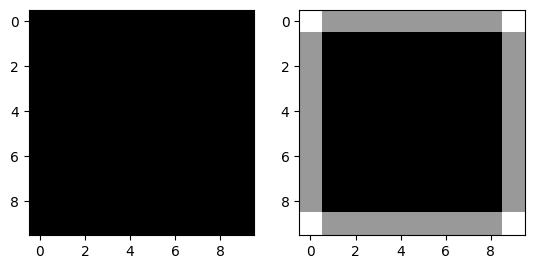

In [ ]:
image=img.copy()
II=3
JJ=3
mask = np.ones((3,1))@np.array([[-0.11,-0.11,-0.11]])
print("mask:\n", mask)
imageConv = convolution2D(image,mask)

fig,(ax0, ax1) = plt.subplots(1,2)
ax0.imshow(img, cmap='gray')
ax1.imshow(imageConv,cmap='gray');

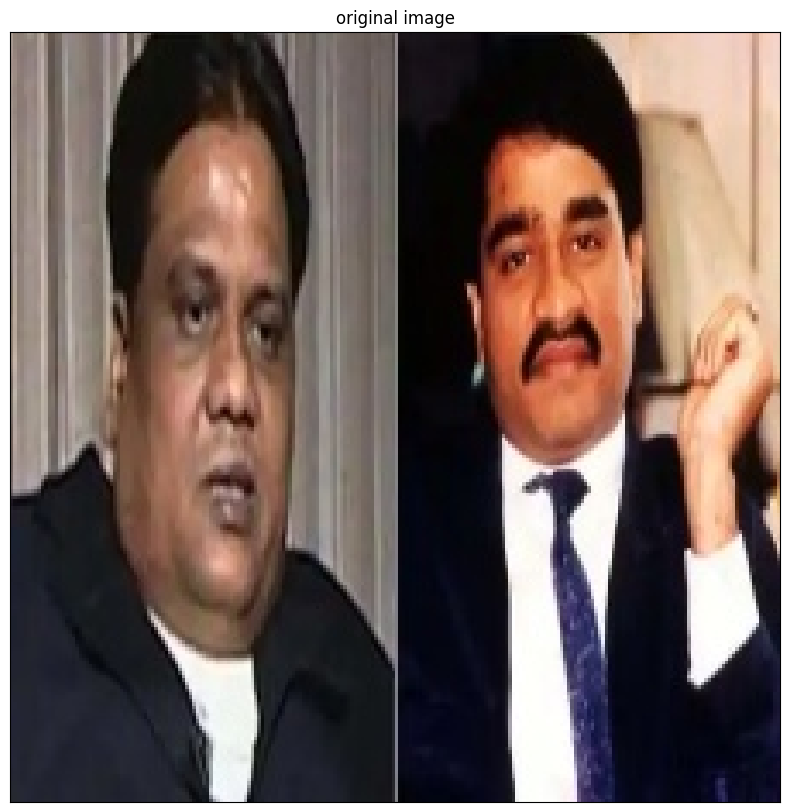

In [ ]:
def plot_im(img, title):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()


img = cv2.imread("/gdrive/MyDrive/mugshots/Testing_images_real_time_scenario_more_than_one_faces/Chhota_Rajan2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_im(img, "original image")

In [ ]:
img = cv2.imread("/gdrive/MyDrive/mugshots/Testing_images_real_time_scenario_more_than_one_faces/Chhota_Rajan2.jpg")[:,:,0].astype(np.float32)
img/=255.
img.shape,img.dtype,np.max(img)

((224, 224), dtype('float32'), 1.0)

In [ ]:
def convolution2D(image, mask, valid=False):


    assert mask.shape[0]%2==1 and mask.shape[1]%2==1, "we want mask with a pixel at the center"

    h,w=image.shape

    II,JJ=mask.shape
    I = (II-1) // 2
    J = (JJ-1) // 2

    if not valid:
        """we add padding (=marge) to avoid side problems.
        One can also use np.pad() """
        img_pad = np.zeros([h+2*I,w+2*J])
        img_pad[I:-I,J:-J]=image

        res=np.zeros_like(image)

        for i in range(0,h):
            for j in range(0,w):
                #print(img_pad[i:i+II , j:j+JJ].shape)
                res[i,j]=np.sum(img_pad[i:i+II , j:j+JJ] * mask)
    else:
        res=np.empty((h-2*I, w-2*J))
        for i in range(I, h-I):
            for j in range(J, w-J):
                res[i-I,j-J] = np.sum(image[i-I:i+I+1 , j-J:j+J+1] * mask)

    return res


In [ ]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a[1:3,0:2]

array([[4, 5],
       [7, 8]])

In [ ]:
def convolution2D_valid(image, mask):

    h,w=image.shape
    II,JJ=mask.shape

    res=np.empty((h-II+1, w-JJ+1))
    for i in range(0, h-II+1):
        for j in range(0, w-JJ+1):
            res[i,j] = np.sum(image[i:i+II , j:j+JJ] * mask)

    return res


In [ ]:
image=np.ones([10,10])
mask=np.ones([3,3])
convolution2D_valid(image,mask)

array([[9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9.]])

In [ ]:
image=img.copy()
II=21
JJ=3
mask = np.ones((II,JJ))/II/JJ
print(mask)

[[0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]
 [0.01587302 0.01587302 0.01587302]]


In [ ]:
%%time
imageConv = convolution2D(image,mask,valid=True)

CPU times: user 305 ms, sys: 0 ns, total: 305 ms
Wall time: 311 ms


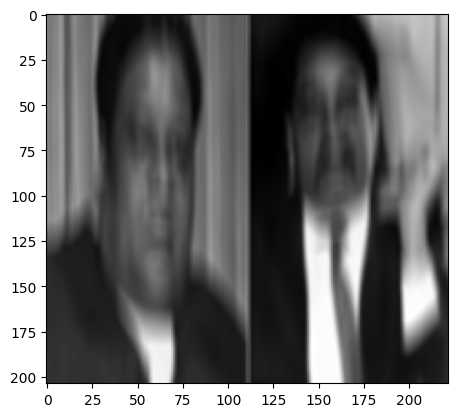

In [ ]:
plt.imshow(imageConv,cmap='gray');

mask:
 [[-12.81231088 -16.16471762 -32.81069328 -28.19459864 -13.95754429]
 [-22.9401444   40.67430739 -23.2342029  -34.5186379   20.07440251]
 [ 39.11104682  -8.28433343 -33.14359537   2.68835841  37.5187976 ]
 [-18.53978918 -21.99321499  36.63077863  47.51322193 -41.79599159]
 [ 36.70057718   2.50229139  36.75892553  -3.01770426  36.23477134]]


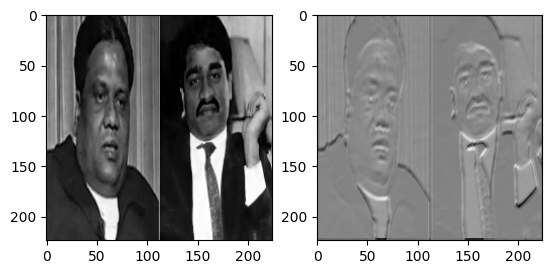

In [ ]:
image=img.copy()
II=5
JJ=5
mask = 2*np.random.random(size=(II,JJ))-1
mask /= np.mean(mask)
print("mask:\n", mask)
imageConv = convolution2D(image,mask)

fig,(ax0, ax1) = plt.subplots(1,2)
ax0.imshow(img, cmap='gray')
ax1.imshow(imageConv,cmap='gray');


mask:
 [[-0.5  1.  -0.5]
 [-0.5  1.  -0.5]
 [-0.5  1.  -0.5]]


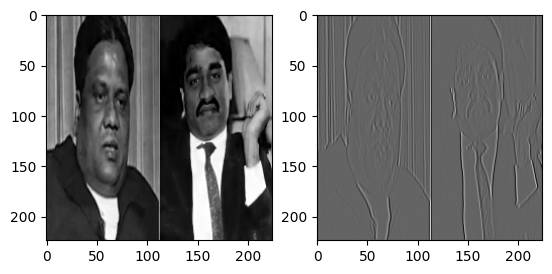

In [ ]:
image=img.copy()
II=3
JJ=3
mask = np.ones((3,1))@np.array([[-0.5,1,-0.5]])
print("mask:\n", mask)
imageConv = convolution2D(image,mask)

fig,(ax0, ax1) = plt.subplots(1,2)
ax0.imshow(img, cmap='gray')
ax1.imshow(imageConv,cmap='gray');

In [ ]:
def rolling_windows_img(a,kshape):
    outShape=(a.shape[0]-kshape[0]+1,)+(a.shape[1]-kshape[1]+1,)+kshape
    outStrides=a.strides+a.strides
    return np.lib.stride_tricks.as_strided(a,shape=outShape,strides=outStrides)

def convolution2Dbis(image, mask):
    rolling = rolling_windows_img(image,mask.shape)
    pre_imageConv = rolling * mask[np.newaxis,np.newaxis,:,:]
    return np.sum(pre_imageConv,axis=(2,3))

In [ ]:
rolling=rolling_windows_img(image,mask.shape)
rolling.shape

(222, 222, 3, 3)

In [ ]:
pre_imageConv=rolling * mask[np.newaxis,np.newaxis,:,:]
pre_imageConv.shape

(222, 222, 3, 3)

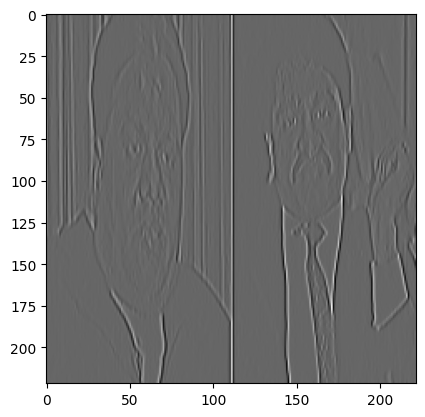

In [ ]:
imageConv = np.sum(pre_imageConv,axis=(2,3))
plt.imshow(imageConv, cmap='gray');

In [ ]:
img1 = img.copy()
II=21
JJ=3
mask = np.ones((II,JJ))/II/JJ

In [ ]:
%%time
imageConv = convolution2Dbis(img1,mask)

CPU times: user 31.5 ms, sys: 6.34 ms, total: 37.9 ms
Wall time: 36.9 ms


In [ ]:
%%time
imageConv = convolution2D(img1,mask)

CPU times: user 317 ms, sys: 0 ns, total: 317 ms
Wall time: 321 ms


In [ ]:
import scipy
from scipy import signal as sg
from scipy import ndimage

In [ ]:
%time
imageConv2 = sg.convolve(image,mask,mode="same")

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


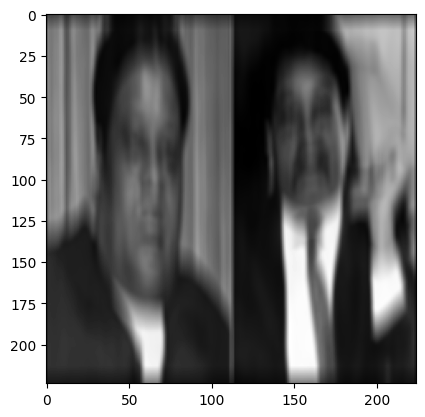

In [ ]:
plt.imshow(imageConv2,cmap='gray');

In [ ]:
%time
imageConv2 = sg.convolve(image,mask,mode="full")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


NameError: ignored

In [ ]:

def gaussian_mask(shape=(3, 3), sigma=0.5):

    if len(shape)!=2: raise ValueError("len-2 shape required")
    if shape[0]%2!=1 or shape[1]%2!=1: raise ValueError("only odd sizes are OK")

    m,n = (shape[0]-1)/2,(shape[1]-1)/2
    y,x = np.ogrid[-m:m+1,-n:n+1]
    res = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )


    """normalization"""
    res/=res.sum()
    return res

In [ ]:
print(gaussian_mask((11, 11)))

[[2.30158674e-44 1.51122114e-36 1.81740102e-30 4.00309214e-26
  1.61496263e-23 1.19330495e-22 1.61496263e-23 4.00309214e-26
  1.81740102e-30 1.51122114e-36 2.30158674e-44]
 [1.51122114e-36 9.92267337e-29 1.19330495e-22 2.62842907e-18
  1.06038397e-15 7.83523662e-15 1.06038397e-15 2.62842907e-18
  1.19330495e-22 9.92267337e-29 1.51122114e-36]
 [1.81740102e-30 1.19330495e-22 1.43507365e-16 3.16096006e-12
  1.27522230e-09 9.42268913e-09 1.27522230e-09 3.16096006e-12
  1.43507365e-16 1.19330495e-22 1.81740102e-30]
 [4.00309214e-26 2.62842907e-18 3.16096006e-12 6.96247786e-08
  2.80886404e-05 2.07548540e-04 2.80886404e-05 6.96247786e-08
  3.16096006e-12 2.62842907e-18 4.00309214e-26]
 [1.61496263e-23 1.06038397e-15 1.27522230e-09 2.80886404e-05
  1.13317663e-02 8.37310570e-02 1.13317663e-02 2.80886404e-05
  1.27522230e-09 1.06038397e-15 1.61496263e-23]
 [1.19330495e-22 7.83523662e-15 9.42268913e-09 2.07548540e-04
  8.37310570e-02 6.18693477e-01 8.37310570e-02 2.07548540e-04
  9.42268913e-09

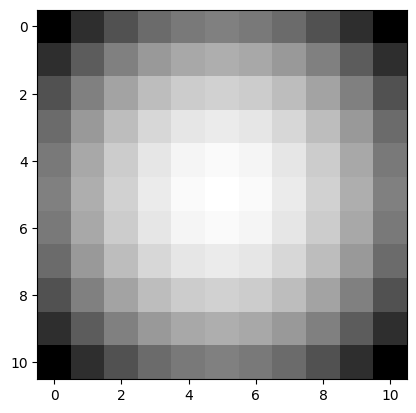

In [ ]:
plt.imshow(np.log(gaussian_mask((11, 11))),cmap="gray");

In [ ]:
random noise (with gaussian distribution), gaussian_mask

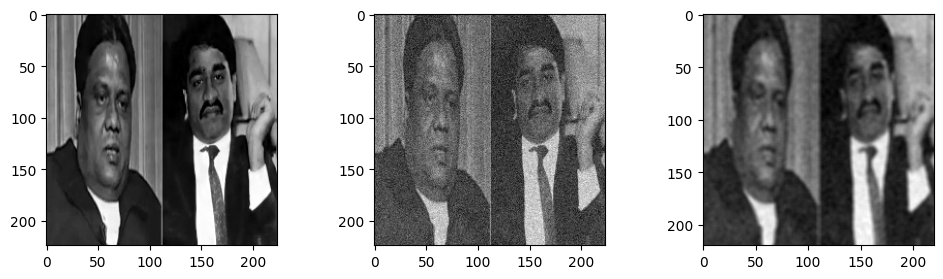

In [ ]:
image=img.copy()

"""random noise (with gaussian distribution)"""
image+=np.random.normal(scale=0.1,size=image.shape)
masque = gaussian_mask(shape=(5,5),sigma=2.)
imageConv=sg.convolve(image,masque, "valid")

fig,(ax0,ax1,ax2)=plt.subplots(1,3,figsize=(12,3))
ax0.imshow(img, cmap='gray')
ax1.imshow(image,cmap='gray')
ax2.imshow(imageConv, cmap='gray');

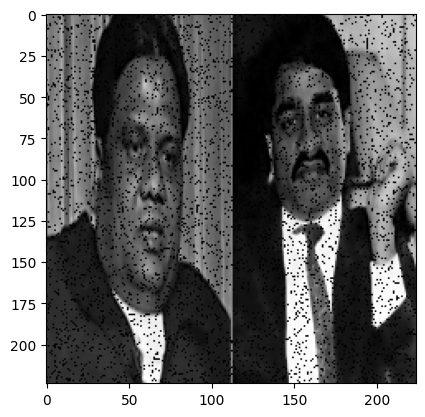

In [ ]:
image=img.copy()
proba=0.1
"""some pixels are modified (ex: parasite occuring during the transmission of the image)"""
image[np.random.uniform(size=image.shape)<proba]=0
plt.imshow(image,cmap="gray");

median filter

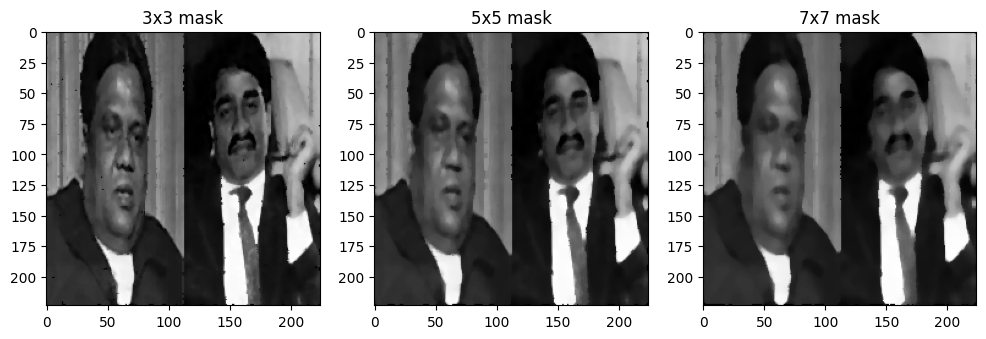

In [ ]:
fig,(ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4))
ax0.set_title("3x3 mask")
image_improved=scipy.signal.medfilt(image,kernel_size=3)
ax0.imshow(image_improved,cmap="gray")

ax1.set_title("5x5 mask")
image_improved=scipy.signal.medfilt(image,kernel_size=5)
ax1.imshow(image_improved,cmap="gray")

ax2.set_title("7x7 mask")
image_improved=scipy.signal.medfilt(image,kernel_size=7)
ax2.imshow(image_improved,cmap="gray");

In [ ]:
""" Convolutions of real functions """
def gaussian_convolution(f, w, sigma):
    assert w%2 == 1, "width w have to be odd."

    r = (w-1)//2
    x = np.linspace(-r,r,w)

    mask = np.exp(-x**2/2/sigma**2)
    mask/= np.sum(mask)

    res = np.zeros(f.shape[0]-2*r)
    for i in range(r, f.shape[0] - r):
        res[i-r] = np.sum(f[i-r:i+r+1]*mask)
    return res
def median_convolution(f, w):
    assert w%2 == 1, "width w have to be odd."

    r = (w-1)//2
    x = np.linspace(-r,r,w)

    res = np.zeros(f.shape[0]-2*r)
    for i in range(r, f.shape[0] - r):
        res[i-r] = np.median(f[i-r:i+r+1])
    return res

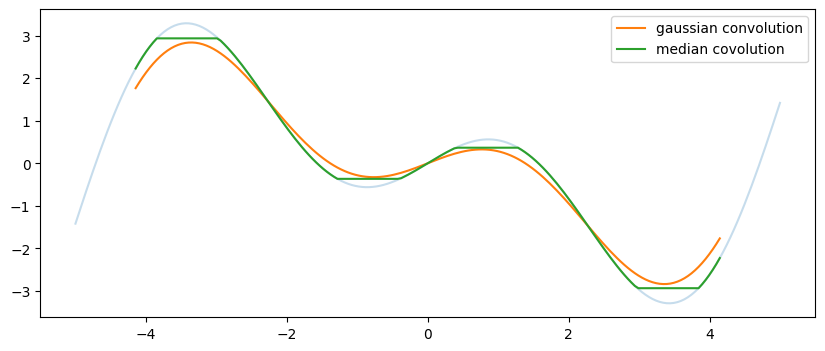

In [ ]:
x = np.linspace(-5,5,200)
f = np.cos(x)*x
w = 35
r = (w-1)//2

fig,ax = plt.subplots(1,1,figsize=(10,4))

ax.plot(x,f,alpha=0.25)

f_g = gaussian_convolution(f,w,w)
ax.plot(x[r:-r],f_g, label="gaussian convolution")

f_m = median_convolution(f,w)
ax.plot(x[r:-r],f_m, label="median covolution")

ax.legend();

In [ ]:
revolutionary filter

In [ ]:
""" for each window, sorts the pixels, and take the mean of the r ones at the center """
""" if r=1, it is the same as the median filter """

def revolutionary_filter(image, kernel_size=5, r=3):
    assert kernel_size%2 == 1, "kernel_size has to be odd."
    assert r%2 == 1, "r has to be odd."
    assert r >= 1, "r has to be between 1 and kernel_size**2"
    assert r <= kernel_size**2, "r has to be between 1 and kernel_size**2"

    rolling = rolling_windows_img(image,(kernel_size,kernel_size))

    res = np.zeros((rolling.shape[0:2]))
    p = (kernel_size**2 - r)//2
    for i in range(rolling.shape[0]):
        for j in range(rolling.shape[1]):
            res[i,j] = np.mean(np.sort(rolling[i,j],axis=None)[p:-p])

    return res


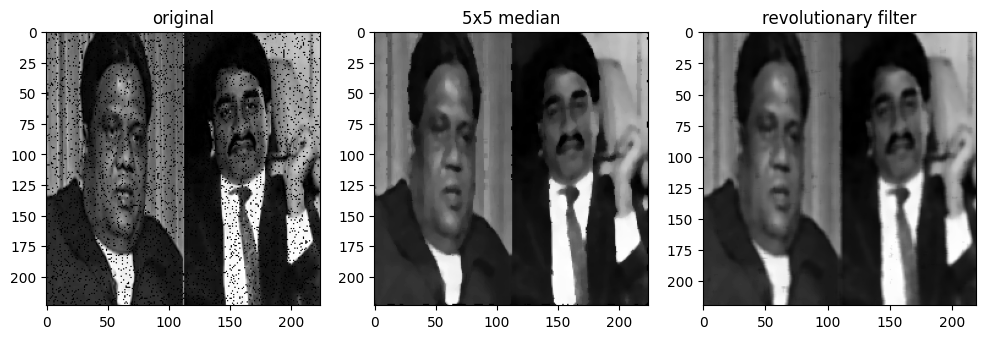

In [ ]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,5))

ax0.set_title("original")
ax0.imshow(image, cmap='gray')

ax1.set_title("5x5 median")
ax1.imshow(scipy.signal.medfilt(image,kernel_size=5), cmap='gray')

ax2.set_title("revolutionary filter")
ax2.imshow(revolutionary_filter(image,r=15),cmap='gray');

In [ ]:
def local_max(direction, grad):
    Z=np.zeros(direction.shape,dtype=np.int8)
    part=grad[1:-1, :]
    np.add(Z[1:-1, :],
           (part>=grad[2:, :]) & (part>grad[:-2, :]),
           where=direction[1:-1, :] == 0,
           out=Z[1:-1, :]
          )
    part=grad[1:-1, 1:-1]
    np.add(Z[1:-1, 1:-1],
           (part>= grad[:-2, 2:]) & (part>grad[2:, :-2]),
           where=direction[1:-1, 1:-1] == 3,
           out=Z[1:-1, 1:-1]
          )
    part=grad[:, 1:-1]
    np.add(Z[:,1:-1],
           (part >= grad[:, 2:]) & (part>grad[:, :-2]),
           where=direction[:, 1:-1] == 2,
           out=Z[:, 1:-1]
          )
    part=grad[1:-1, 1:-1]
    np.add(Z[1:-1, 1:-1],
           (part >= grad[2:, 2:]) & (part>grad[:-2, :-2]),
           where=direction[1:-1, 1:-1] == 1,
           out=Z[1:-1, 1:-1]
          )
    return Z

In [ ]:
def getCompassOperators(kind:str):
    res=np.empty([8,3,3])

    if kind=="kirsch":
        conv_mask = np.array([5,  5, 5,-3,-3,-3,-3,-3])
    elif kind=="robinson2":
        conv_mask = np.array([1,2,1,0,-1,-2,-1,0])
    elif kind=="robinson1":
        conv_mask = np.array([1,1,1,0,-1,-1,-1,0])


    for i in range(8):
        oneDir=np.zeros(9)
        oneDir[[0,1,2,5,8,7,6,3]]=conv_mask
        "to turn the coef"
        conv_mask=np.concatenate([conv_mask[1:],conv_mask[0:1]])
        res[i,:,:]=oneDir.reshape([3,3])

    return res


In [ ]:
canny edge detection

In [ ]:
def canny(img, low_thr = 0.1, high_thr = 0.2, sigma=None):
    # Gaussian smoothing
    if sigma is not None:
        masque = gaussian_mask(shape=(31,31),sigma=sigma)
        img = sg.convolve(img, masque, "same")

    # gradient computing
    operators=getCompassOperators("robinson2")
    all_grad = np.abs(np.array([sg.convolve(img, operators[i,:,:], "valid") for i in range(4)]))

    direction = np.argmax(all_grad, axis=0)
    grad=np.max(all_grad,axis=0)
    grad/=np.max(grad)

    # gradient local max computing
    Z = local_max(direction, grad)

    # Thresholding
    strong_edge = (grad >= high_thr) & (Z)
    neighbours = np.array([[1,1,1],[1,0,1],[1,1,1]])
    strong_edge_neighbour = (sg.convolve(strong_edge,neighbours,mode="same") > 0)

    Z[grad <= low_thr] = 0
    Z[(low_thr < grad) & (grad < high_thr) & (~strong_edge_neighbour)] = 0

    return Z;

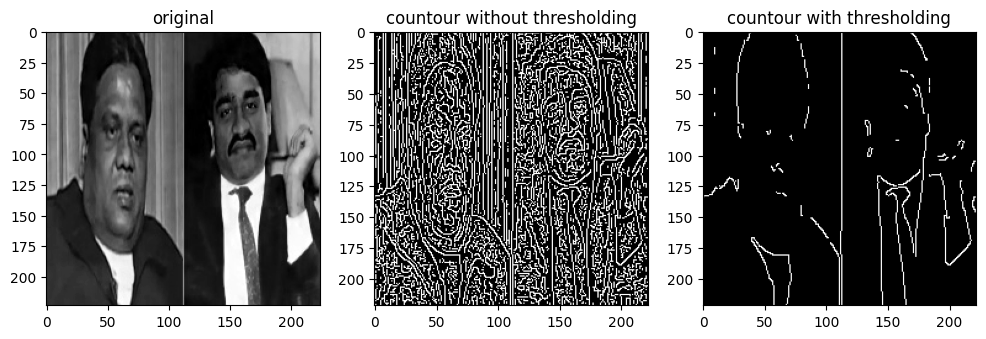

In [ ]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(12,4))
ax0.set_title("original")
ax0.imshow(img,cmap='gray')

ax1.set_title("countour without thresholding")
ax1.imshow(canny(img,0,0),cmap='gray')

ax2.set_title("countour with thresholding")
ax2.imshow(canny(img,0.2,0.4),cmap='gray');

In [ ]:
canny edge detection

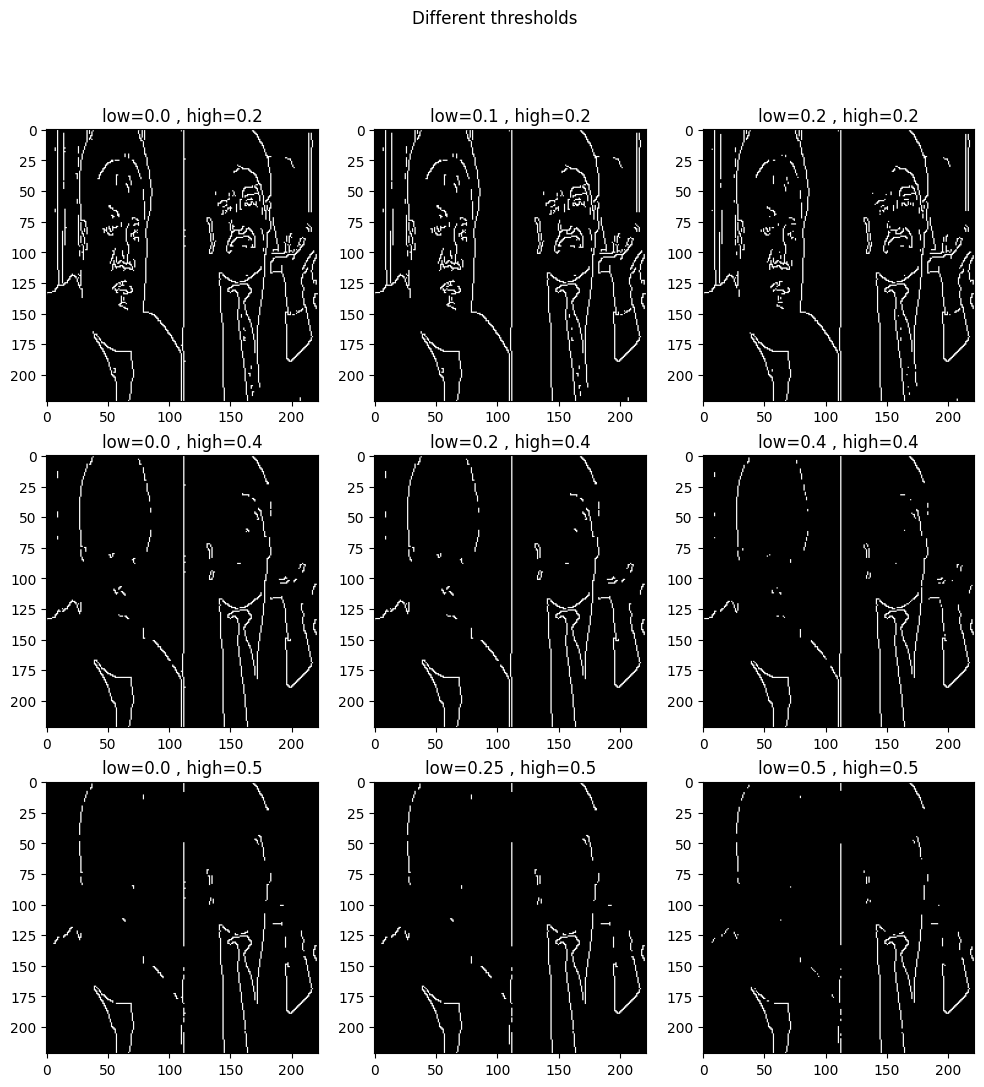

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(12,12))
fig.suptitle("Different thresholds")

high = [0.2, 0.4, 0.5]

for i in range(3):
    ax[i,0].imshow(canny(img,0,high[i]),cmap='gray')
    ax[i,0].set_title("low=0.0 , high="+str(high[i]))
    ax[i,1].imshow(canny(img,high[i]/2,high[i]),cmap='gray')
    ax[i,1].set_title("low=" + str(high[i]/2) + " , high="+str(high[i]))
    ax[i,2].imshow(canny(img,high[i],high[i]),cmap='gray')
    ax[i,2].set_title("low=" + str(high[i]) + " , high="+str(high[i]))

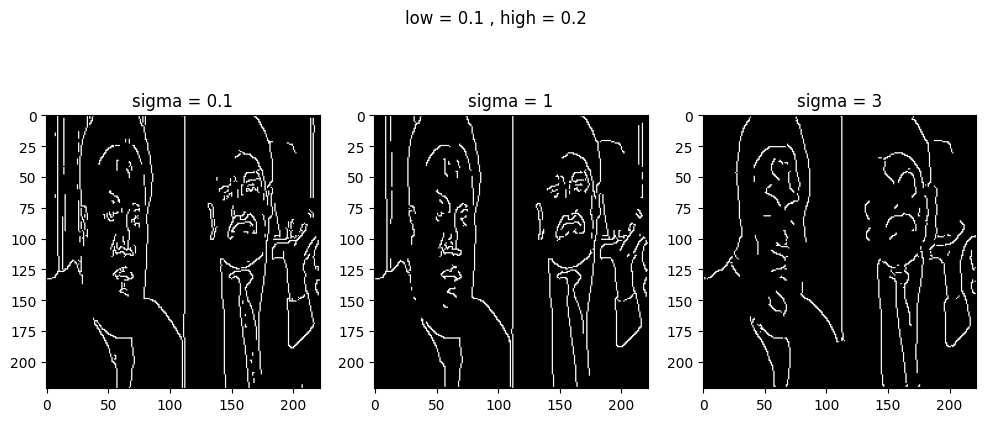

In [ ]:
low,high = 0.1,0.2
sigma = [0.1,1,3]

fig, ax = plt.subplots(1,3,figsize=(12,5))
fig.suptitle("low = " + str(low) + " , high = " + str(high))

for i in range(3):
    ax[i].set_title("sigma = " + str(sigma[i]))
    ax[i].imshow(canny(img,low,high,sigma[i]),cmap='gray')